In [3]:
from experiment_utils import gen_spice_map, gen_central_spice_heap, gen_river_line, gen_river_random, no_river, tribe_locations_naturally_distributed, tribe_locations_single_cluster_per_tribe, split_tribes_locations, random_locations
from model import DuneModel
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../scripts')

In [4]:
model_params = {
    "experiment_name": "a",
    "width": 100,
    "height": 100,
    "n_tribes": 2,
    "n_agents": 800,
    "n_heaps": 8,
    "vision_radius": 1,
    "step_count": 100,
    "trade_percentage": 0.5,
    "spice_movement_bias": 0.5,
    "tribe_movement_bias": 0.5, 
    "spice_grow_threshold": 30,
    "spice_generator": gen_spice_map,
    "river_generator": gen_river_line,
    "location_generator": tribe_locations_naturally_distributed,
    "spice_kwargs": {
        "total_spice": 10000,
        "cov_range": (10, 20)
    },
    "spice_threshold": 9150
}
mod = DuneModel(**model_params)

In [5]:
spice_gen_functions = [gen_spice_map, gen_central_spice_heap]
river_gen_functions = [gen_river_line, gen_river_random]
tribe_loc_functions = [random_locations, tribe_locations_naturally_distributed, tribe_locations_single_cluster_per_tribe, split_tribes_locations]

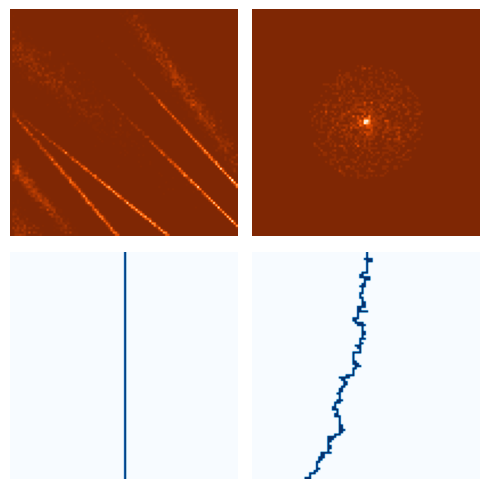

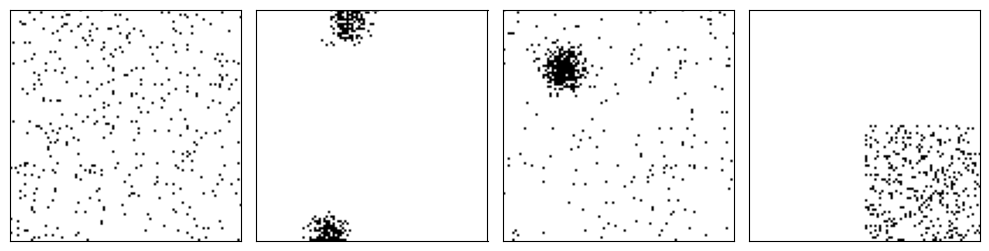

In [6]:
# Example data (replace with your actual data generation logic)
spice_maps = [spice_gen_function(mod) for spice_gen_function in spice_gen_functions]
river_maps = [river_gen_function(mod).T for river_gen_function in river_gen_functions]
agents_maps = [tribe_loc_function(mod) for tribe_loc_function in tribe_loc_functions]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(5, 5))

# Plot spice maps
for i, spice_map in enumerate(spice_maps):
    axes[0, i].imshow(spice_map, cmap='Oranges_r')
    # axes[0, i].set_title('Spice Map ' + str(i+1))
    axes[0, i].axis('off')  # Hide the axes

# Plot river maps
for i, river_map in enumerate(river_maps):
    axes[1, i].imshow(river_map, cmap='Blues')
    # axes[1, i].set_title('River Map ' + str(i+1))
    axes[1, i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(10, 5))
# Plot agents maps
for i, agents_map in enumerate(agents_maps):
    # agents_mpa is a list of tuples, make sure the add them to the map
    map = np.zeros((100,100))
    for (x, y) in agents_map:
            map[x, y] = 1
    axes[i].imshow(map, cmap='binary')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()